In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os                                                   # to set current working directory 
import math                                                 # basic calculations like square root
from sklearn import tree                                    # tree program from scikit learn (package for machine learning)
from sklearn.tree import _tree                              # for accessing tree information
from sklearn import metrics                                 # measures to check our models
from sklearn.tree import export_graphviz                    # graphical visualization of trees
from sklearn.preprocessing import StandardScaler            # standardize variables to mean of 0.0 and variance of 1.0

from sklearn.model_selection import cross_val_score         # cross validation methods
from sklearn.tree import DecisionTreeRegressor              # decision tree method
from sklearn import model_selection
from sklearn.ensemble import BaggingRegressor               # bagging tree method
from sklearn.ensemble import RandomForestRegressor          # random forest method

import pandas as pd                                         # DataFrames and plotting
import pandas.plotting as pd_plot
import numpy as np                                          # arrays and matrix math
import matplotlib.pyplot as plt                             # plotting
from subprocess import check_call
import geostatspy.GSLIB as GSLIB                            # geostatistics and spatial methods
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [3]:
os.chdir("c:/Users/User/OneDrive - The University of Texas at Austin/Ram/Documents/UT/Research/Dr. Hildebrandt Research")                                       

In [4]:
df = pd.read_csv("NO2.csv", infer_datetime_format = True)
df["DateTime"] = pd.to_datetime(df["DateTime"])

In [5]:
df.head()
df = df.apply(lambda x: x.fillna(x.mean()))

In [6]:
df.describe()

,Alipur__Delhi__DPCC,Anand_Vihar,Ashok_Vihar__Delhi__DPCC,Aya_Nagar__Delhi__IMD,Bawana,Burari_Crossing,CRRI_Mathura_Road,DTU,Dr._Karni_Singh_Shooting_Range,DwarkaSector_8,...,Pusa__Delhi__IMD,R_K_Puram,Shadipur,Sirifort,Sirifort__Delhi__CPCB,Sonia_Vihar,Sonia_Vihar__Delhi__DPCC,Sri_Aurobindo_Marg__Delhi__DPC,Vivek_Vihar__Delhi__DPCC,Wazirpur__Delhi__DPCC
count,52585.000000,52585.000000,52585.000000,52585.000000,52585.000000,52585.000000,52585.000000,52585.000000,52585.000000,52585.000000,...,52585.000000,52585.000000,52585.000000,52585.000000,52585.000000,52585.000000,52585.000000,52585.000000,52585.000000,52585.000000
mean,47.370503,88.039680,42.982194,23.345467,37.899163,38.159473,37.905638,38.940091,45.807133,44.649294,...,34.650060,57.175041,56.341788,52.235231,39.202179,43.388759,34.736803,47.436276,33.638484,50.772870
std,17.454139,48.142374,22.323502,11.128342,18.515321,15.097898,29.801734,24.002671,35.809558,24.412527,...,25.930925,30.903947,37.102870,29.348598,24.860665,32.674096,17.093562,23.778988,15.425493,23.754865
min,2.050000,2.100000,2.050000,2.010000,2.050000,2.030000,2.020000,2.020000,2.050000,2.100000,...,2.020000,2.050000,2.020000,2.030000,2.020000,2.010000,2.080000,2.030000,2.080000,2.030000
25%,47.370503,60.160000,36.300000,19.460000,37.899163,38.159473,26.630000,30.900000,30.050000,37.390000,...,25.290000,40.490000,28.260000,39.200000,34.330000,23.680000,28.920000,42.580000,28.460000,44.600000
50%,47.370503,88.039680,42.982194,23.345467,37.899163,38.159473,37.905638,38.940091,45.807133,44.649294,...,34.650060,57.175041,55.320000,52.235231,39.202179,43.388759,34.736803,47.436276,33.638484,50.772870
75%,47.370503,98.980000,42.982194,23.345467,37.899163,38.159473,37.905638,38.940091,45.807133,44.649294,...,34.650060,57.175041,70.950000,52.235231,39.202179,44.600000,34.736803,47.436276,33.638484,50.772870
max,236.450000,904.050000,495.200000,434.690000,276.880000,344.480000,452.410000,538.430000,835.030000,453.990000,...,542.400000,468.230000,442.590000,581.450000,383.830000,901.990000,281.370000,471.700000,281.370000,471.700000


In [7]:
df = df.set_index(["DateTime"])
df.head(5)

,Alipur__Delhi__DPCC,Anand_Vihar,Ashok_Vihar__Delhi__DPCC,Aya_Nagar__Delhi__IMD,Bawana,Burari_Crossing,CRRI_Mathura_Road,DTU,Dr._Karni_Singh_Shooting_Range,DwarkaSector_8,...,Pusa__Delhi__IMD,R_K_Puram,Shadipur,Sirifort,Sirifort__Delhi__CPCB,Sonia_Vihar,Sonia_Vihar__Delhi__DPCC,Sri_Aurobindo_Marg__Delhi__DPC,Vivek_Vihar__Delhi__DPCC,Wazirpur__Delhi__DPCC
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,47.370503,88.03968,42.982194,23.345467,37.899163,20.25,35.69,38.940091,51.50,44.649294,...,34.65006,57.175041,56.341788,52.235231,39.202179,39.0,34.736803,47.436276,33.638484,50.77287
2015-01-01 01:00:00,47.370503,88.03968,42.982194,23.345467,37.899163,20.82,35.58,38.940091,47.00,44.649294,...,34.65006,57.175041,56.341788,52.235231,39.202179,47.0,34.736803,47.436276,33.638484,50.77287
2015-01-01 02:00:00,47.370503,88.03968,42.982194,23.345467,37.899163,20.62,35.45,38.940091,40.50,44.649294,...,34.65006,57.175041,56.341788,52.235231,39.202179,54.0,34.736803,47.436276,33.638484,50.77287
2015-01-01 03:00:00,47.370503,88.03968,42.982194,23.345467,37.899163,19.69,35.51,38.940091,36.75,44.649294,...,34.65006,57.175041,56.341788,52.235231,39.202179,59.0,34.736803,47.436276,33.638484,50.77287
2015-01-01 04:00:00,47.370503,88.03968,42.982194,23.345467,37.899163,10.85,35.82,38.940091,31.75,44.649294,...,34.65006,57.175041,56.341788,52.235231,39.202179,64.5,34.736803,47.436276,33.638484,50.77287


In [8]:
Alipur_df = pd.DataFrame({"Alipur":df.iloc[:, 0]})
Alipur_df.head()

,Alipur
DateTime,
2015-01-01 00:00:00,47.370503
2015-01-01 01:00:00,47.370503
2015-01-01 02:00:00,47.370503
2015-01-01 03:00:00,47.370503
2015-01-01 04:00:00,47.370503


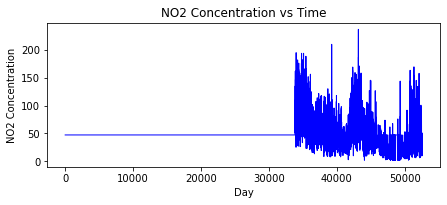

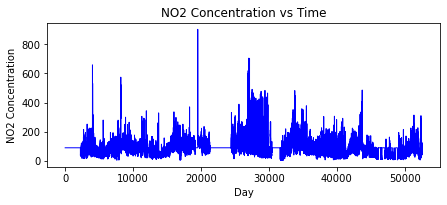

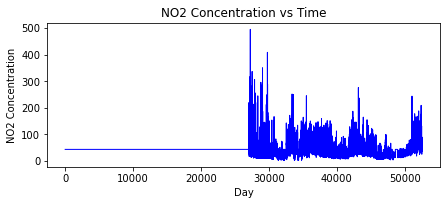

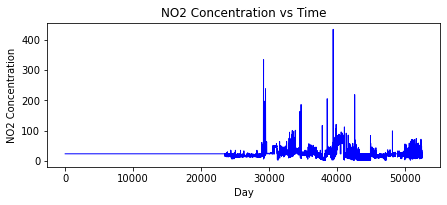

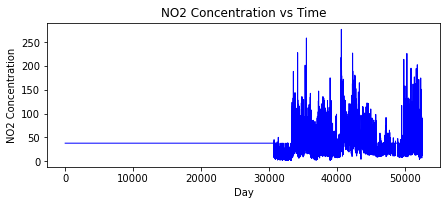

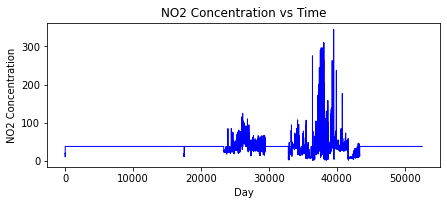

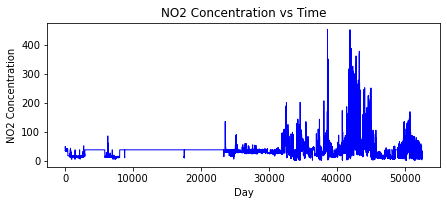

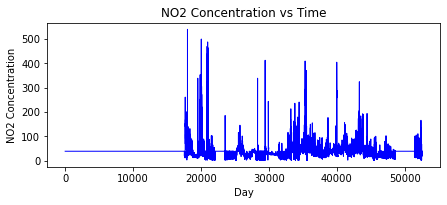

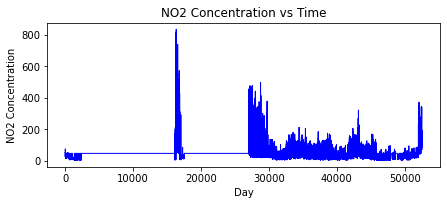

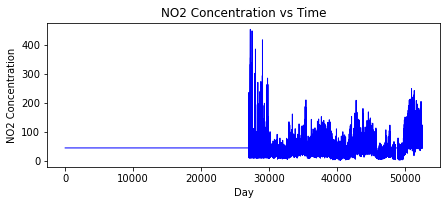

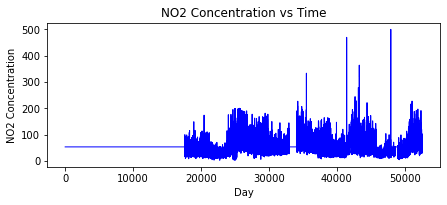

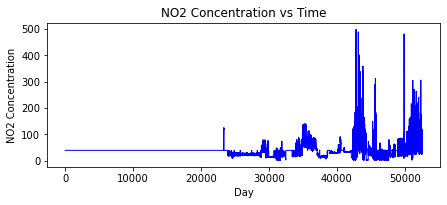

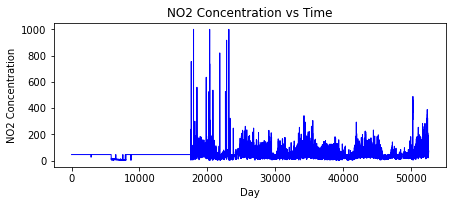

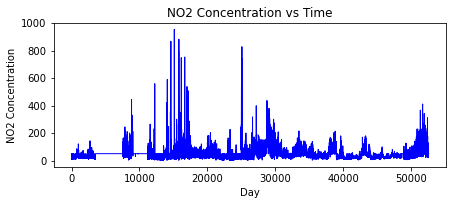

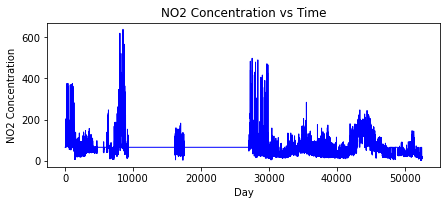

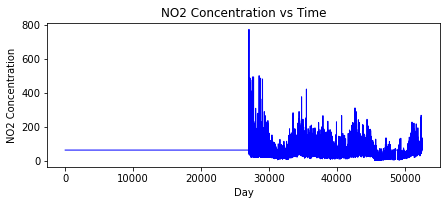

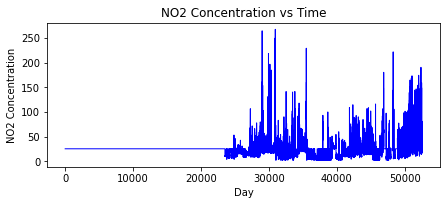

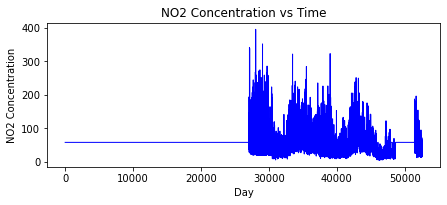

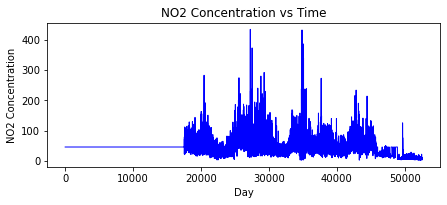

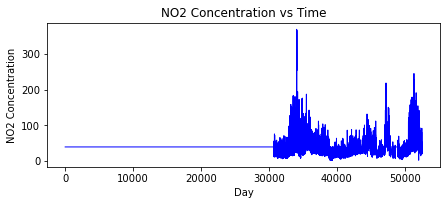

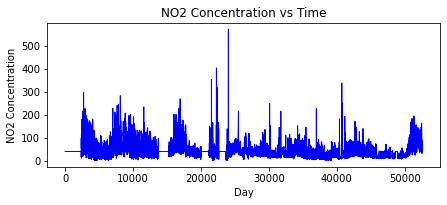

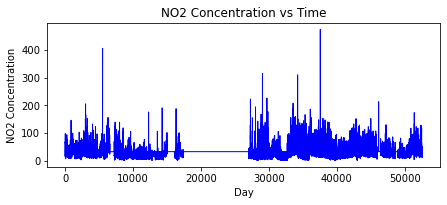

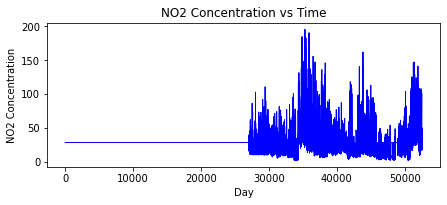

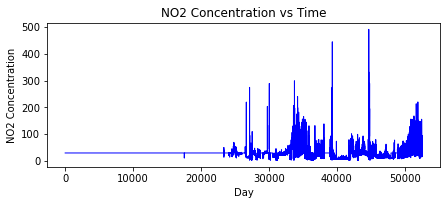

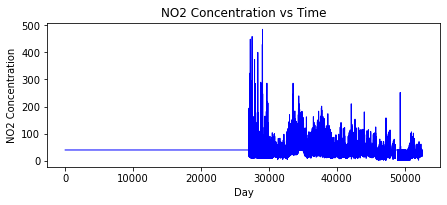

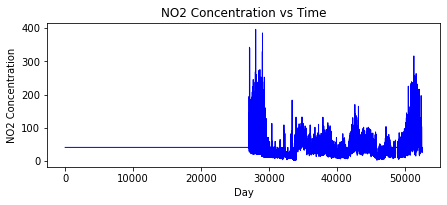

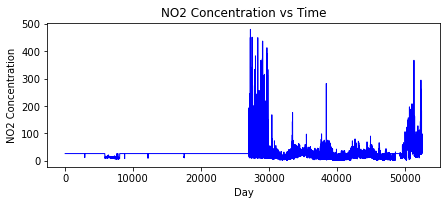

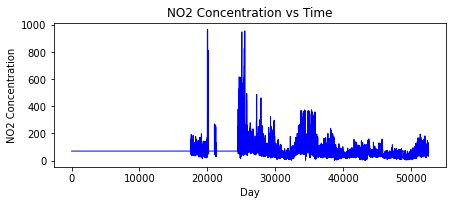

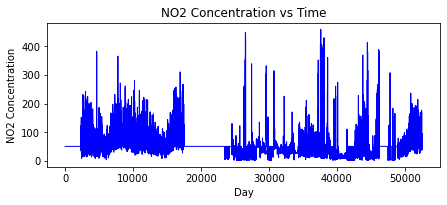

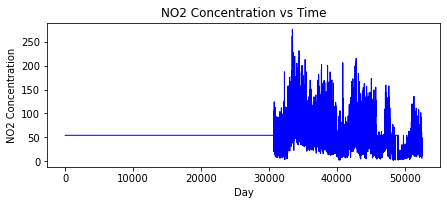

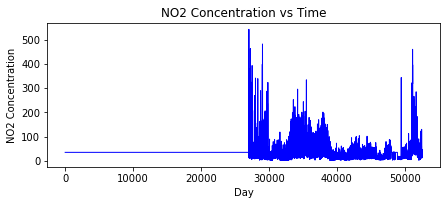

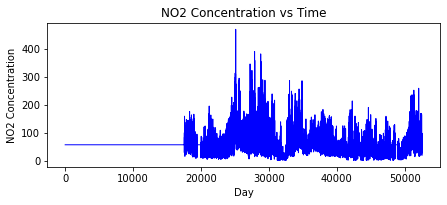

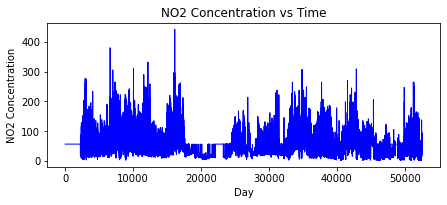

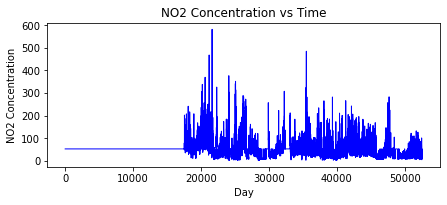

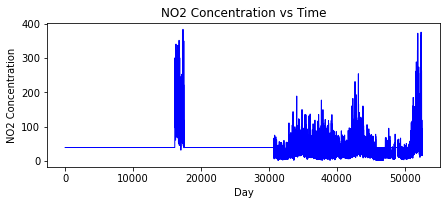

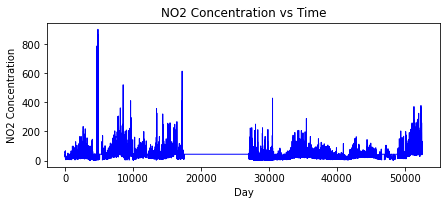

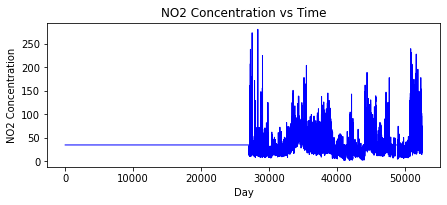

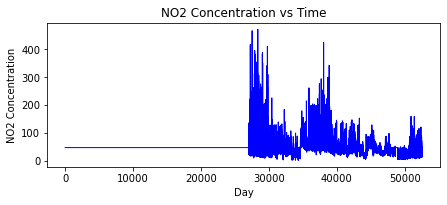

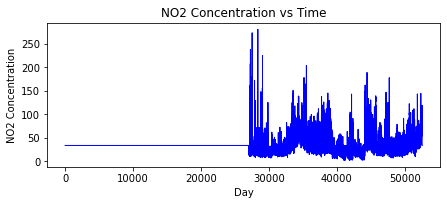

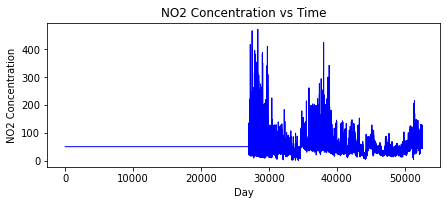

In [9]:
nx = len(df)
x_value = np.linspace(1,nx,nx)
for i in range(len(df.columns)):
    plt.subplot(1, 2, 1)
    plt.plot(x_value,df.iloc[:, i].values,color='blue',linewidth=1)
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.0, wspace=0.2, hspace=0.2)
    plt.title('NO2 Concentration vs Time'); plt.xlabel('Day'); plt.ylabel('NO2 Concentration')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.5, wspace=0.2, hspace=0.2)
    plt.show()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


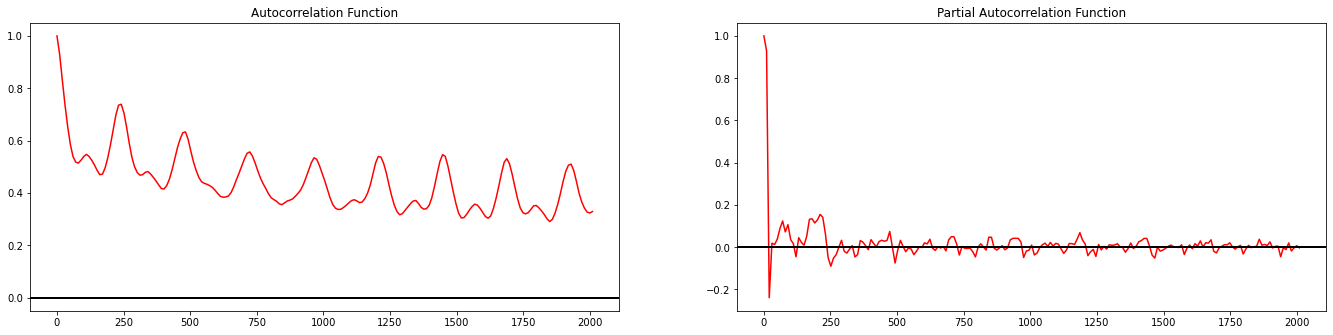

In [10]:
from statsmodels.tsa.stattools import acf, pacf
nlags = 200
xsiz = 10
lag_acf = acf(df.iloc[:, 0], nlags=nlags)
lag_pacf = pacf(df.iloc[:, 0], nlags=nlags, method='ols')
lags = np.linspace(0,(nlags+1)*xsiz,nlags+1)

#Plot ACF: 
plt.subplot(121) 
plt.plot(lags,lag_acf,color='red')
plt.axhline(y=0,linewidth = 2,color='black')
#plt.axhline(y=-1.96/np.sqrt(len(series_noise)),linestyle='--',color='gray')
#plt.axhline(y=1.96/np.sqrt(len(series_noise)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lags,lag_pacf,color='red')
plt.axhline(y=0,linewidth = 2,color='black')
#plt.axhline(y=-1.96/np.sqrt(len(series_noise)),linestyle='--',color='gray')
#plt.axhline(y=1.96/np.sqrt(len(series_noise)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.0, wspace=0.2, hspace=0.2)

In [11]:
print('Dickey-Fuller Test Results:')
dftest = adfuller(df.iloc[:, 0], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput[0:7])

Dickey-Fuller Test Results:
Test Statistic                -1.154242e+01
p-value                        3.607705e-21
#Lags Used                     5.600000e+01
Number of Observations Used    5.252800e+04
Critical Value (1%)           -3.430474e+00
Critical Value (5%)           -2.861595e+00
Critical Value (10%)          -2.566799e+00
dtype: float64


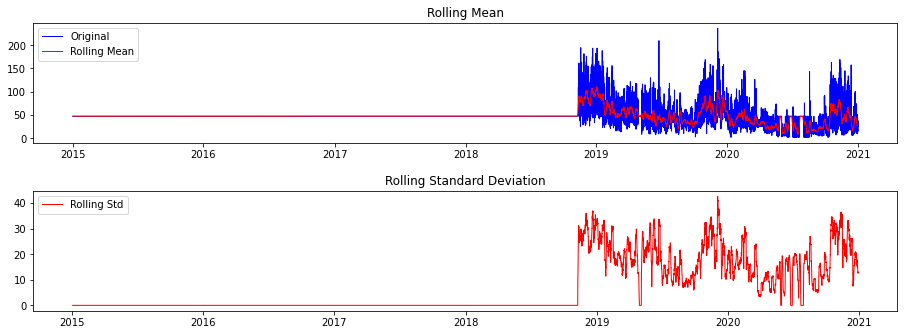

In [12]:
window_size = 105                        # assume window size of 10 days

#Determing rolling statistics
rolling_mean = df.rolling(window = window_size, center = True).mean()
rolling_std = df.rolling(window = window_size, center = True).std()
rolling_P025 = df.rolling(window = window_size, center = True).quantile(.025)
rolling_P975 = df.rolling(window = window_size, center = True).quantile(.975)

#Plot rolling statistics:
plt.subplot(211)
orig = plt.plot(df.iloc[:, 0], color='green',linewidth = 1, label='Original')
mean = plt.plot(rolling_mean.iloc[:, 0], color='red', linewidth = 1, label='Rolling Mean')
plt.title('Rolling Mean'); plt.legend(loc='best')
    
plt.subplot(212)
std = plt.plot(rolling_std.iloc[:, 0], color='red', linewidth = 1, label = 'Rolling Std')
plt.legend(loc='best'); plt.title('Rolling Standard Deviation')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.5, hspace=0.4)

In [13]:
ts_df = pd.DataFrame(df.iloc[:, 0])
ts_df["rolling"] = rolling_mean.iloc[:, 0].values
ts_df["residual"] = ts_df.iloc[:, 0].values - ts_df["rolling"].values
ts_df.describe()

,Alipur__Delhi__DPCC,rolling,residual
count,52585.000000,52481.000000,5.248100e+04
mean,47.370503,47.392049,-7.187726e-05
std,17.454139,12.764665,1.126546e+01
min,2.050000,8.589143,-6.790676e+01
25%,47.370503,47.370503,-7.105427e-15
50%,47.370503,47.370503,7.105427e-15
75%,47.370503,47.370503,7.105427e-15
max,236.450000,110.316571,1.675463e+02


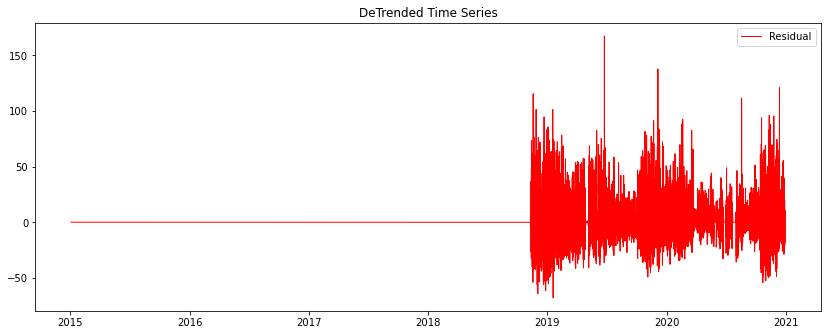

In [14]:
plt.subplot(121)
orig = plt.plot(ts_df['residual'], color='red',linewidth = 1, label='Residual')
plt.title('DeTrended Time Series'); plt.legend(loc='best')
plt.subplots_adjust(left=0.0, bottom=0.0, right=4.0, top=1.0, wspace=0.2, hspace=0.2)

In [15]:
print('Dickey-Fuller Test Results:')
residual = ts_df['residual'] 
residual = residual[~pd.isnull(residual)]             # remove null values
dftest = adfuller(residual, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput[0:7])

Dickey-Fuller Test Results:
Test Statistic                   -42.389330
p-value                            0.000000
#Lags Used                        58.000000
Number of Observations Used    52422.000000
Critical Value (1%)               -3.430475
Critical Value (5%)               -2.861595
Critical Value (10%)              -2.566799
dtype: float64


In [16]:
diff1 = np.diff(ts_df.iloc[:, 0].values)
diff1 = np.append(diff1,diff1[diff1.size-1])          # double the last value to keep the length the same
ts_df['first_difference'] = diff1

diff2 = np.diff(ts_df['first_difference'].values)
diff2 = np.append(diff2,diff2[diff2.size-1])          # double the last value to keep the length the same
ts_df['second_difference'] = diff2
ts_df.head()

,Alipur__Delhi__DPCC,rolling,residual,first_difference,second_difference
DateTime,,,,,
2015-01-01 00:00:00,47.370503,NaN,NaN,0.0,0.0
2015-01-01 01:00:00,47.370503,NaN,NaN,0.0,0.0
2015-01-01 02:00:00,47.370503,NaN,NaN,0.0,0.0
2015-01-01 03:00:00,47.370503,NaN,NaN,0.0,0.0
2015-01-01 04:00:00,47.370503,NaN,NaN,0.0,0.0


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


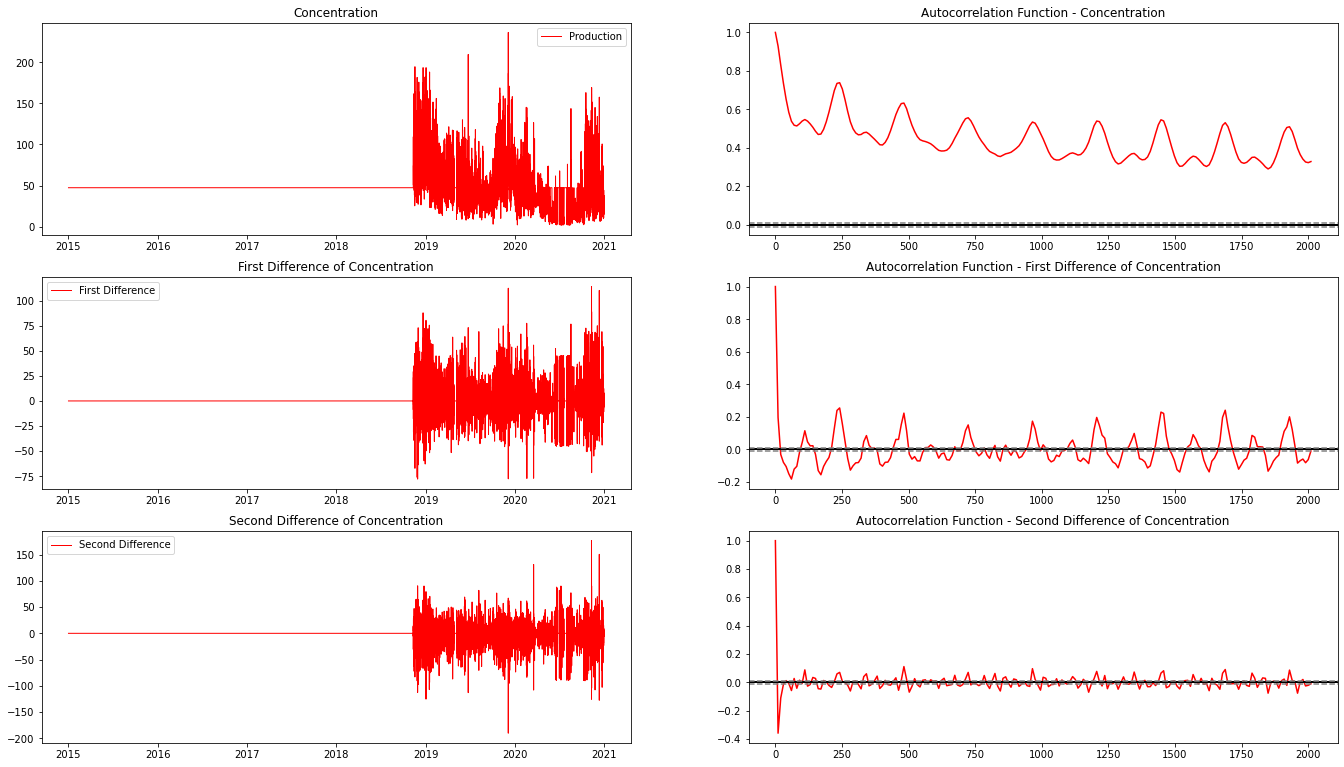

In [17]:
from statsmodels.tsa.stattools import acf

nlags = 200
lags = np.linspace(0,(nlags+1)*xsiz,nlags+1)

prod_lag_acf = acf(ts_df.iloc[:, 0], nlags=nlags)
prod_d1_lag_acf = acf(ts_df['first_difference'], nlags=nlags)
prod_d2_lag_acf = acf(ts_df['second_difference'], nlags=nlags)

plt.subplot(321)
orig = plt.plot(ts_df.iloc[:, 0], color='red',linewidth = 1, label='Production')
plt.title('Concentration'); plt.legend(loc='best')

plt.subplot(322) 
plt.plot(lags,prod_lag_acf,color='red')
plt.axhline(y=0,linewidth = 2,color='black')
plt.axhline(y=-1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.title('Autocorrelation Function - Concentration')

plt.subplot(323)
orig = plt.plot(ts_df['first_difference'], color='red',linewidth = 1, label='First Difference')
plt.title('First Difference of Concentration'); plt.legend(loc='best')

plt.subplot(324) 
plt.plot(lags,prod_d1_lag_acf,color='red')
plt.axhline(y=0,linewidth = 2,color='black')
plt.axhline(y=-1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.title('Autocorrelation Function - First Difference of Concentration')

plt.subplot(325)
orig = plt.plot(ts_df['second_difference'], color='red',linewidth = 1, label='Second Difference')
plt.title('Second Difference of Concentration'); plt.legend(loc='best')

plt.subplot(326) 
plt.plot(lags,prod_d2_lag_acf,color='red')
plt.axhline(y=0,linewidth = 2,color='black')
plt.axhline(y=-1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.title('Autocorrelation Function - Second Difference of Concentration')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=2.5, wspace=0.2, hspace=0.2)

In [18]:
print('Dickey-Fuller Test Results - First Differenced Concentration:')
residual = ts_df['first_difference'] 
residual = residual[~pd.isnull(residual)]             # remove null values
dftest = adfuller(residual, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput[0:7])

print('Dickey-Fuller Test Results - Second Differenced Concnetration:')
residual = ts_df['second_difference'] 
residual = residual[~pd.isnull(residual)]             # remove null values
dftest = adfuller(residual, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput[0:7])

Dickey-Fuller Test Results - First Differenced Concentration:
Test Statistic                   -37.500847
p-value                            0.000000
#Lags Used                        58.000000
Number of Observations Used    52526.000000
Critical Value (1%)               -3.430475
Critical Value (5%)               -2.861595
Critical Value (10%)              -2.566799
dtype: float64
Dickey-Fuller Test Results - Second Differenced Concnetration:
Test Statistic                   -60.884540
p-value                            0.000000
#Lags Used                        58.000000
Number of Observations Used    52526.000000
Critical Value (1%)               -3.430475
Critical Value (5%)               -2.861595
Critical Value (10%)              -2.566799
dtype: float64


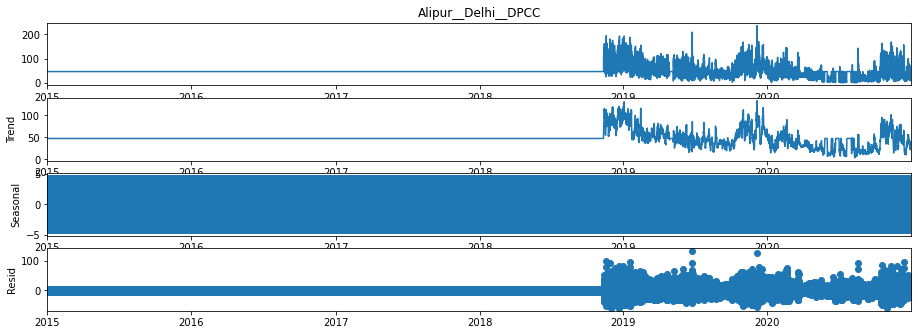

In [19]:
decomposition = seasonal_decompose(ts_df.iloc[:, 0], model='additive',extrapolate_trend=1,filt=np.ones(20)/20,two_sided = True)
decomp_trend = decomposition.trend; decomp_seasonal = decomposition.seasonal; decomp_residual = decomposition.resid
fig = decomposition.plot()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


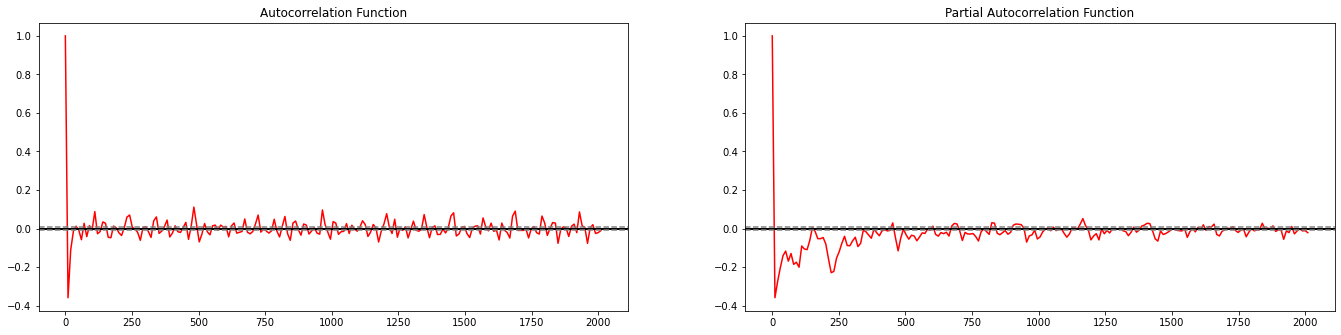

In [20]:
nlags = 200
lag_acf = acf(residual, nlags=nlags)
lag_pacf = pacf(residual, nlags=nlags, method='ols')
lags = np.linspace(0,(nlags+1)*xsiz,nlags+1)

#Plot ACF: 
plt.subplot(121) 
plt.plot(lags,lag_acf,color='red')
plt.axhline(y=0,linewidth = 2,color='black')
plt.axhline(y=-1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lags,lag_pacf,color='red')
plt.axhline(y=0,linewidth = 2,color='black')
plt.axhline(y=-1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.0, wspace=0.2, hspace=0.2)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

model = pm.auto_arima(ts_df.iloc[:, 0], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=8760,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic


In [ ]:
model_fit = model.fit(disp = 0)
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [ ]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
train = ts_df.iloc[:45000,0]
test = ts_df.iloc[45000:,0]

In [ ]:
plt.subplot(321)
plt.plot(train, color='red',linewidth = 1, label='Production Train')
plt.plot(test, color='black',linewidth = 1, label='Production Test')
plt.title('Production'); plt.legend(loc='best'), plt.xlabel('Days'), plt.ylabel('Emissions')
plt.subplots_adjust(left=0.0, bottom=0.0, right=5.0, top=2.0, wspace=0.2, hspace=0.2)

In [ ]:
# the following code taken from https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
# Fit the model to training data
model = ARIMA(train, order=(3, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast with fit model
fc, se, conf = fitted.forecast(7585, alpha=0.05)  # 95% conf

# Convert estimate and confidence interval to Pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot the training, testing and forecast with confidence intervals
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training', color = 'red',linewidth = 1)
plt.plot(test, label='actual', color = 'green',linewidth = 1)
plt.plot(fc_series, label='forecast', color = 'blue',linewidth = 1)
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals'); plt.xlabel('Days'); plt.ylabel('Production')
plt.legend(loc='upper left', fontsize=8)
plt.show()